# PROBLEM STATEMENT :-
####  Recurrent Neural Network (RNN) :- Use the Google stock prices dataset and design a time series analysis and prediction system using RNN.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.run_functions_eagerly(True)

## Loading Dataset

In [2]:
data=pd.read_csv('./goog.csv')

## Dataset Statistics

In [3]:
data

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400
...,...,...,...,...,...,...
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400


In [4]:
data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [5]:
data.ndim

2

In [6]:
data.size

366

In [7]:
data.shape

(61, 6)

In [8]:
data.info

<bound method DataFrame.info of           Date        Open        High         Low       Close   Volume
0   12/19/2016  790.219971  797.659973  786.270020  794.200012  1225900
1   12/20/2016  796.760010  798.650024  793.270020  796.419983   925100
2   12/21/2016  795.840027  796.676025  787.099976  794.559998  1208700
3   12/22/2016  792.359985  793.320007  788.580017  791.260010   969100
4   12/23/2016  790.900024  792.739990  787.280029  789.909973   623400
..         ...         ...         ...         ...         ...      ...
56   3/13/2017  844.000000  848.684998  843.250000  845.539978  1149500
57   3/14/2017  843.640015  847.239990  840.799988  845.619995   779900
58   3/15/2017  847.590027  848.630005  840.770020  847.200012  1379600
59   3/16/2017  849.030029  850.849976  846.130005  848.780029   970400
60   3/17/2017  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 6 columns]>

In [9]:
data.describe()

,Open,High,Low,Close,Volume
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,814.005573,817.755576,809.734066,814.561804,1.361269e+06
std,18.784303,18.556004,19.384799,19.265955,4.987376e+05
min,778.809998,782.780029,770.409973,771.820007,6.234000e+05
25%,799.679993,802.700012,793.270020,801.340027,1.057900e+06
50%,809.510010,815.250000,804.539978,809.559998,1.247700e+06
75%,828.659973,833.250000,825.059998,830.630005,1.494500e+06
max,851.609985,853.400024,847.109985,852.119995,3.228900e+06


## Checking for Missing Values in Dataset

In [10]:
data.isnull()

,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
56,False,False,False,False,False,False
57,False,False,False,False,False,False
58,False,False,False,False,False,False
59,False,False,False,False,False,False


In [11]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
data.isnull().sum().sum()

0

## Data Normalization 

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [14]:
scaled_data

array([[0.27870496],
       [0.30635093],
       [0.28318798],
       [0.24209223],
       [0.22527981],
       [0.24570341],
       [0.16475695],
       [0.13661236],
       [0.        ],
       [0.17833138],
       [0.18779601],
       [0.27646347],
       [0.42752207],
       [0.43374872],
       [0.41058501],
       [0.44943925],
       [0.43013678],
       [0.44906604],
       [0.4083435 ],
       [0.42652559],
       [0.37801975],
       [0.41344979],
       [0.5914072 ],
       [0.64819422],
       [0.79514303],
       [0.75130792],
       [0.64122041],
       [0.37982571],
       [0.31095859],
       [0.29732258],
       [0.33262797],
       [0.36948926],
       [0.36762172],
       [0.43773312],
       [0.4552927 ],
       [0.4699875 ],
       [0.52117039],
       [0.59053537],
       [0.60560414],
       [0.58729739],
       [0.6518054 ],
       [0.70049824],
       [0.74520517],
       [0.73399766],
       [0.74109613],
       [0.70759672],
       [0.71556701],
       [0.639

## Splitting Dataset into Training Data and Test Data

In [15]:
training_size=int(len(scaled_data)*0.8)
train_data=scaled_data[:training_size]
test_data=scaled_data[training_size:]

In [16]:
train_data

array([[0.27870496],
       [0.30635093],
       [0.28318798],
       [0.24209223],
       [0.22527981],
       [0.24570341],
       [0.16475695],
       [0.13661236],
       [0.        ],
       [0.17833138],
       [0.18779601],
       [0.27646347],
       [0.42752207],
       [0.43374872],
       [0.41058501],
       [0.44943925],
       [0.43013678],
       [0.44906604],
       [0.4083435 ],
       [0.42652559],
       [0.37801975],
       [0.41344979],
       [0.5914072 ],
       [0.64819422],
       [0.79514303],
       [0.75130792],
       [0.64122041],
       [0.37982571],
       [0.31095859],
       [0.29732258],
       [0.33262797],
       [0.36948926],
       [0.36762172],
       [0.43773312],
       [0.4552927 ],
       [0.4699875 ],
       [0.52117039],
       [0.59053537],
       [0.60560414],
       [0.58729739],
       [0.6518054 ],
       [0.70049824],
       [0.74520517],
       [0.73399766],
       [0.74109613],
       [0.70759672],
       [0.71556701],
       [0.639

In [17]:
train_data.shape

(48, 1)

In [18]:
test_data

array([[0.7897882 ],
       [0.73237866],
       [0.7130762 ],
       [0.69688705],
       [0.74831849],
       [0.79140719],
       [0.8326276 ],
       [0.88953927],
       [0.91805706],
       [0.91905354],
       [0.93872997],
       [0.95840639],
       [1.        ]])

In [19]:
test_data.shape

(13, 1)

## Creating Sequences for Time Series Analysis

In [20]:
def create_sequences(data,time_steps=6):
    x=[]
    y=[]
    for i in range(len(data)-time_steps):
        x.append(data[i:i+time_steps,0])
        y.append(data[i+time_steps,0])
    return np.array(x),np.array(y)

In [21]:
x_train,y_train=create_sequences(train_data)
x_test,y_test=create_sequences(test_data)

In [22]:
x_train

array([[0.27870496, 0.30635093, 0.28318798, 0.24209223, 0.22527981,
        0.24570341],
       [0.30635093, 0.28318798, 0.24209223, 0.22527981, 0.24570341,
        0.16475695],
       [0.28318798, 0.24209223, 0.22527981, 0.24570341, 0.16475695,
        0.13661236],
       [0.24209223, 0.22527981, 0.24570341, 0.16475695, 0.13661236,
        0.        ],
       [0.22527981, 0.24570341, 0.16475695, 0.13661236, 0.        ,
        0.17833138],
       [0.24570341, 0.16475695, 0.13661236, 0.        , 0.17833138,
        0.18779601],
       [0.16475695, 0.13661236, 0.        , 0.17833138, 0.18779601,
        0.27646347],
       [0.13661236, 0.        , 0.17833138, 0.18779601, 0.27646347,
        0.42752207],
       [0.        , 0.17833138, 0.18779601, 0.27646347, 0.42752207,
        0.43374872],
       [0.17833138, 0.18779601, 0.27646347, 0.42752207, 0.43374872,
        0.41058501],
       [0.18779601, 0.27646347, 0.42752207, 0.43374872, 0.41058501,
        0.44943925],
       [0.27646347, 0

In [23]:
y_train

array([0.16475695, 0.13661236, 0.        , 0.17833138, 0.18779601,
       0.27646347, 0.42752207, 0.43374872, 0.41058501, 0.44943925,
       0.43013678, 0.44906604, 0.4083435 , 0.42652559, 0.37801975,
       0.41344979, 0.5914072 , 0.64819422, 0.79514303, 0.75130792,
       0.64122041, 0.37982571, 0.31095859, 0.29732258, 0.33262797,
       0.36948926, 0.36762172, 0.43773312, 0.4552927 , 0.4699875 ,
       0.52117039, 0.59053537, 0.60560414, 0.58729739, 0.6518054 ,
       0.70049824, 0.74520517, 0.73399766, 0.74109613, 0.70759672,
       0.71556701, 0.63997538])

In [24]:
x_test

array([[0.7897882 , 0.73237866, 0.7130762 , 0.69688705, 0.74831849,
        0.79140719],
       [0.73237866, 0.7130762 , 0.69688705, 0.74831849, 0.79140719,
        0.8326276 ],
       [0.7130762 , 0.69688705, 0.74831849, 0.79140719, 0.8326276 ,
        0.88953927],
       [0.69688705, 0.74831849, 0.79140719, 0.8326276 , 0.88953927,
        0.91805706],
       [0.74831849, 0.79140719, 0.8326276 , 0.88953927, 0.91805706,
        0.91905354],
       [0.79140719, 0.8326276 , 0.88953927, 0.91805706, 0.91905354,
        0.93872997],
       [0.8326276 , 0.88953927, 0.91805706, 0.91905354, 0.93872997,
        0.95840639]])

In [25]:
y_test

array([0.8326276 , 0.88953927, 0.91805706, 0.91905354, 0.93872997,
       0.95840639, 1.        ])

In [26]:
x_train.shape

(42, 6)

In [27]:
y_train.shape

(42,)

In [28]:
x_test.shape

(7, 6)

In [29]:
y_test.shape

(7,)

## Building the Recurrent Neural Network (RNN) Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(1))

## Model Summary

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model Compilation

In [32]:
model.compile(optimizer='adam',loss='mse')

## Model Training

In [33]:
model.fit(x_train,y_train,epochs=50,batch_size=4)

Epoch 1/50
 7/11 [==================>...........] - ETA: 0s - loss: 0.2057

/Users/aryangalande/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 [==============================] - 0s 18ms/step - loss: 0.1721
Epoch 2/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0271
Epoch 3/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0274
Epoch 4/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0306
Epoch 5/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0251
Epoch 6/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0254
Epoch 7/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0239
Epoch 8/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0232
Epoch 9/50
11/11 [==============================] - 0s 19ms/step - loss: 0.0236
Epoch 10/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0231
Epoch 11/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0240
Epoch 12/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0236
Epoch 13/50
11/11 [=============================

## Model Evaluation

In [34]:
training_metrics=model.evaluate(x_train,y_train)

2/2 [==============================] - 0s 11ms/step - loss: 0.0099


In [35]:
training_metrics

0.009877017699182034

In [36]:
testing_metrics=model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.0270


In [37]:
testing_metrics

0.027031350880861282

## Model Prediction

In [38]:
y_pred=model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

1/1 [==============================] - 0s 16ms/step


In [39]:
y_pred

array([[825.92566],
       [829.8354 ],
       [833.4928 ],
       [835.6553 ],
       [835.3011 ],
       [834.86194],
       [834.8645 ]], dtype=float32)

In [40]:
y_test

array([[838.679993],
       [843.25    ],
       [845.539978],
       [845.619995],
       [847.200012],
       [848.780029],
       [852.119995]])

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('Mean Absolute Error: ',mae)
print('Mean Squared Error: ',mse)
print('Root Mean Squared Error: ',rmse)

Mean Absolute Error:  13.036193784598206
Mean Squared Error:  174.30068295172003
Root Mean Squared Error:  13.202298396556564


## Future Stock Price Prediction (Next Day based on Last 6 Days)

In [42]:
last_6_days=data['Close'][-6:].values
last_6_days_scaled=scaler.transform(last_6_days.reshape(-1,1))

In [43]:
last_6_days

array([843.25    , 845.539978, 845.619995, 847.200012, 848.780029,
       852.119995])

In [44]:
last_6_days_scaled

array([[0.88953927],
       [0.91805706],
       [0.91905354],
       [0.93872997],
       [0.95840639],
       [1.        ]])

In [45]:
pred=[]
pred.append(last_6_days_scaled)
pred=np.array(pred)
pred=np.reshape(pred,(pred.shape[0],pred.shape[1],1))
pred

array([[[0.88953927],
        [0.91805706],
        [0.91905354],
        [0.93872997],
        [0.95840639],
        [1.        ]]])

In [46]:
pred_price=model.predict(pred)
pred_price=scaler.inverse_transform(pred_price)
print('Predicted Price for the Next Day: ', pred_price[0][0])

1/1 [==============================] - 0s 16ms/step
Predicted Price for the Next Day:  836.27893


/Users/aryangalande/anaconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


## Model Visualization
#### Actual Price v/s Predicted Price

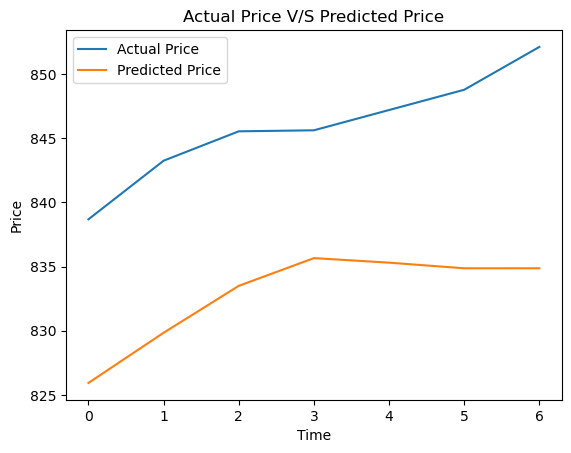

In [47]:
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred,label='Predicted Price')
plt.title('Actual Price V/S Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()